<a href="https://colab.research.google.com/github/Tanjul5/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Live Class Monitoring System(Face Emotion Recognition)**

Emotion recognition is the process of identifying human emotion. People vary widely in their accuracy at recognizing the emotions of others. Use of technology to help people with emotion recognition is a relatively nascent research area. Generally, the technology works best if it uses multiple modalities in context. To date, the most work has been conducted on automating the recognition of facial expressions from video, spoken expressions from audio, written expressions from text, and physiology as measured by wearables.

Facial expressions are a form of nonverbal communication. Various studies have been done for the classification of these facial expressions. There is strong evidence for the universal facial expressions of seven emotions which include: neutral happy, sadness, anger, disgust, fear, and surprise. So it is very important to detect these emotions on the face as it has wide applications in the field of Computer Vision and Artificial Intelligence. These fields are researching on the facial emotions to get the sentiments of the humans automatically.

# **Problem Statement**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge. In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention.

Digital classrooms are conducted via video telephony software program (ex-Zoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analyzed using deep learning algorithms.

Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analyzed and tracked.

I will solve the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions.

I have built a deep learning model which detects the real time emotions of students through a webcam so that teachers can understand if students are able to grasp the topic according to students' expressions or emotions and then deploy the model. The model is trained on the FER-2013 dataset .This dataset consists of 35887 grayscale, 48x48 sized face images with seven emotions - angry, disgusted, fearful, happy, neutral, sad and surprised. 

In [1]:
!pip install tensorflow


     |████████████████████████████████| 462 kB 11.4 MB/s 


In [2]:
import os
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## CNN Models ##
import keras
import tensorflow as tf
from keras import optimizers
from keras.utils import np_utils
from keras.regularizers import l2
from keras.datasets import mnist
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D
from keras.layers import Dropout, BatchNormalization, Activation
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,concatenate
from keras.models import Model
from keras import layers

tf.keras.applications.resnet50.ResNet50

#!pip keras.applications import ResNet50
from keras.models import load_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
# Reading CSV file
df = pd.read_csv('/content/drive/MyDrive/face emotion recognition/files/fer2013.csv')

In [6]:
df.head(2)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [8]:
df[['Usage']].value_counts()

Usage      
Training       28709
PrivateTest     3589
PublicTest      3589
dtype: int64

In [9]:
df[df['Usage']=='PrivateTest']

,emotion,pixels,Usage
32298,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest
32299,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest
32300,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest
32301,4,200 197 149 139 156 89 111 58 62 95 113 117 11...,PrivateTest
32302,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...,PrivateTest
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [10]:
df.shape

(35887, 3)

In [11]:
# Dictionary mapping for individual emotions
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


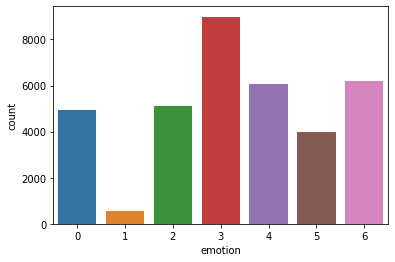

In [12]:
# Plotting distribution of emotions
sns.countplot(df.emotion)
plt.show()

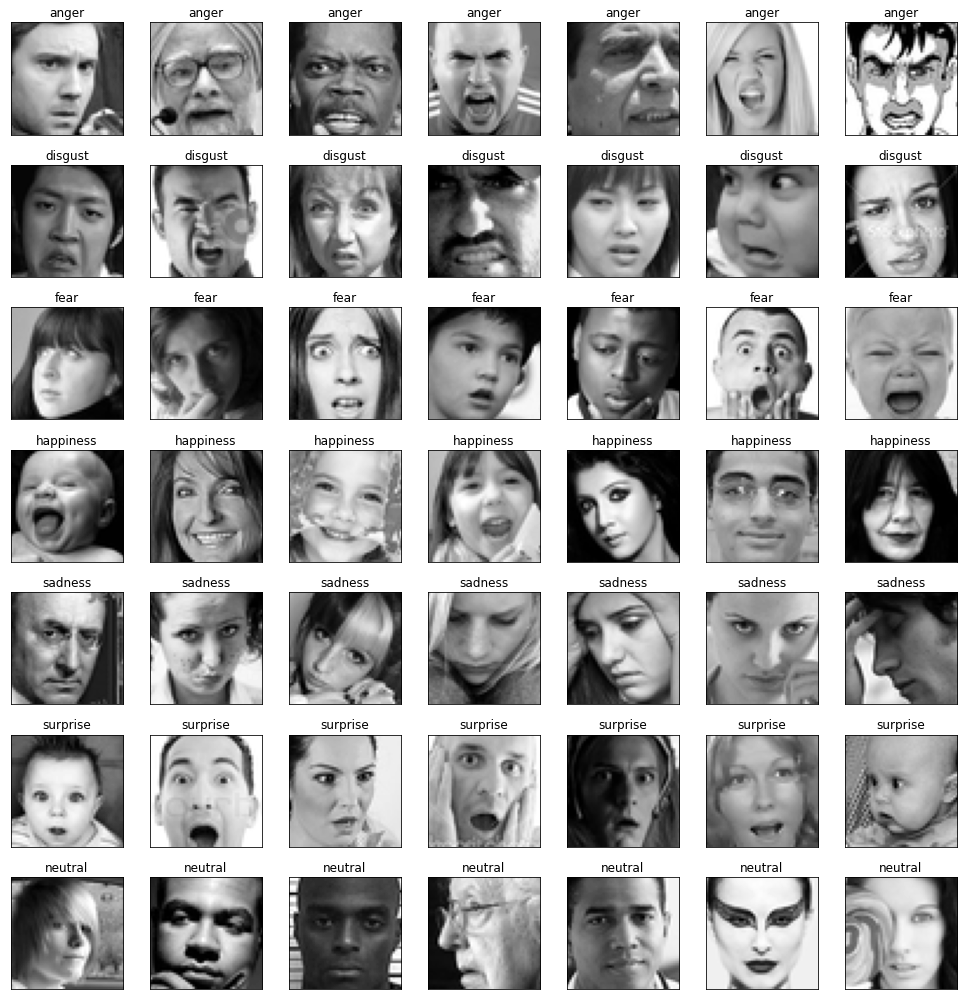

In [13]:
#Read all Training images
fig = plt.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [14]:
df = df[df.emotion.isin(emotion_label_to_text)]
df.shape

(35887, 3)

In [15]:
batch_size = 32
num_epochs = 50
input_shape = (48, 48, 1)
validation_split = .2
verbose = 1
num_classes = 7
base_path = 'models/'
shape_x = 48
shape_y = 48
image_size=(48,48)

In [16]:
df['pixels']=df['pixels'].astype("string") #converting dtype of pixels to string
pixels = df['pixels'].tolist() #Making list of pixels
width, height = 48, 48 # initializing image shape
faces = [] #Empty list
# Making images as required for our models  
for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.strip().split(' ',48*48)]
    face = np.asarray(face).reshape(width, height)
    face = cv2.resize(face.astype('uint8'),image_size)
    faces.append(face.astype('float32'))
# Converting to array and dimension for transfer Learning
faces = np.asarray(faces)
faces = np.expand_dims(faces, -1)
faces /= 127.5 # normalizing the data
faces -= 1.
# Converting Emotions to numpy array
emotions = pd.get_dummies(df['emotion']).to_numpy()

Data Augmentation

Data Augmentation:- taking the batch and apply some series of random transformations (random rotation, resizing, shearing) to increase generalizability of model.

In [17]:
# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,#Set input mean to 0 over the dataset, feature-wise.
                        featurewise_std_normalization=False,# Divide inputs by std of the dataset, feature-wise.
                        rotation_range=10,      # randomly rotate images in the range (degrees, 0 to 180)
                        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                        height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
                        zoom_range=.1,          # randomly zoom into images
                        horizontal_flip=True)   # randomly flip images

ImageDataGenerator

horizontal and vertical shift => moving all pixels of image in one direction

width_shift_range ( horizonatal shift)

height_shift_range (vertical shift)

floating num [0- 1] --> % of shift

horizontal n vertical flips augmentation ==>reversing rows or cols of pixels --> True or False

Random rotation --> 0 - 360 degrees --> rotation_range = 90 ==> means random rotation to image blw 0 and 90 degrees

random brightness --> randomly darkens or brightens images ==> brightness_range =[0.2,1.0] --> means darkens or brightens if pixel is blw 0.2 and 1

random zoom

either adds pixel or subtract pixels in image . [1-value, 1+value] for example , zoom_range = .3 --> range [0.7, 1.3] or blw 70%(zoom in) and 130% (zoomout)

Splitting data into train and test datset

In [18]:
from sklearn.model_selection import train_test_split
#train test split
xtrain, xtest,ytrain,ytest = train_test_split(faces, emotions,test_size=0.3,shuffle=True)
xval,xtest,yval,ytest=train_test_split(xtest,ytest,test_size=0.3,shuffle=True)

In [19]:
# Checking shapes
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape, xval.shape, xtest.shape, yval.shape, ytest.shape

((25120, 48, 48, 1),
 (3231, 48, 48, 1),
 (25120, 7),
 (3231, 7),
 (7536, 48, 48, 1),
 (3231, 48, 48, 1),
 (7536, 7),
 (3231, 7))

# **Method 1: Xception **

In [20]:
# Defining entry flow
def entry_flow(inputs) :
    
    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    previous_block_activation = x
    
    for size in [64, 128, 256] :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = MaxPooling2D(3, strides=2, padding='same')(x)
        
        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)
        
        x = keras.layers.Add()([x, residual])
        previous_block_activation = x
    
    return x

In [21]:
# Defining middle flow
def middle_flow(x, num_blocks=8) :
    
    previous_block_activation = x
    
    for _ in range(num_blocks) :
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
    
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = Activation('relu')(x)
        x = SeparableConv2D(256, 3, padding='same')(x)
        x = BatchNormalization()(x)
        
        x = keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x
    
    return x
    

In [22]:
# Defining exit flow
def exit_flow(x, num_classes=7) :
    
    previous_block_activation = x
    
    x = Activation('relu')(x)
    x = SeparableConv2D(256, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    
    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = keras.layers.Add()([x, residual])
      
    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)
    
    return x

In [23]:
# creating input and output of model
inputs = Input(shape=(shape_x, shape_y, 1))
outputs = exit_flow(middle_flow(entry_flow(inputs)))

In [24]:
# saving the model
xception = Model(inputs, outputs,name="Xception")

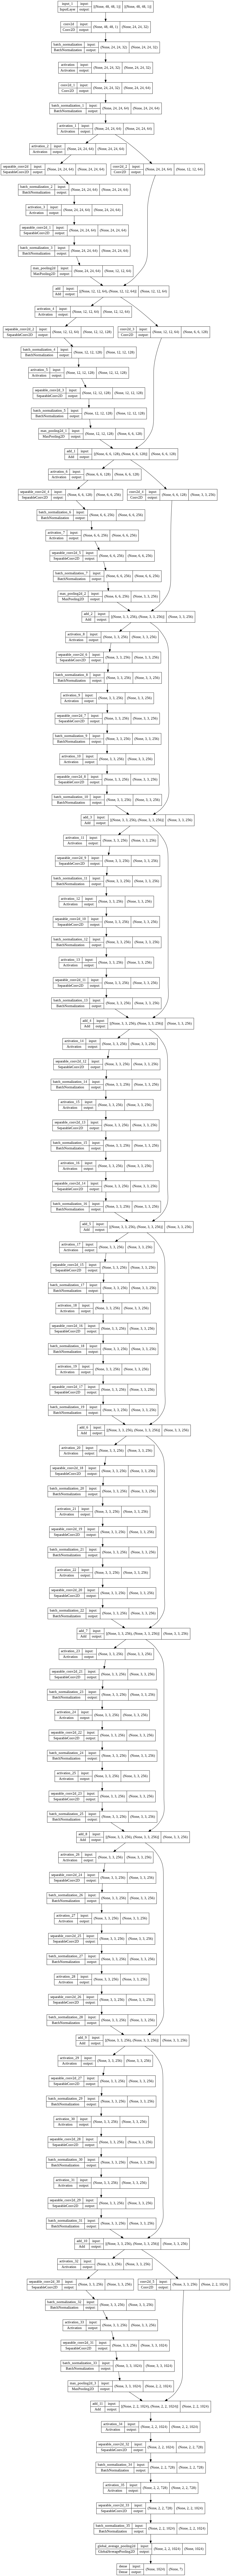

In [25]:
# Plotting architecture of defined model
plot_model(xception, to_file='xception.png', show_shapes=True, show_layer_names=True)

In [26]:
# Compiling the model
xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception.summary()  #gives the information about the architecture and configuration of the neural network.

Model: "Xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 24, 24, 32)   320         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 24, 24, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 24, 24, 32)   0           ['batch_normalization[0][0

In [27]:
# Compiling the model
xception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception.summary()  #gives the information about the architecture and configuration of the neural network.

Model: "Xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 24, 24, 32)   320         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 24, 24, 32)  128         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 24, 24, 32)   0           ['batch_normalization[0][0

# **MODEL2**

**CNN**

In [28]:
# Building up Model Architecture
def CNN():
    model = Sequential()

    #1st CNN layer
    model.add(Conv2D(64,(3,3),padding = 'same', name='image_array', input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    #2nd CNN layer
    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #3rd CNN layer
    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))

    #4th CNN layer
    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Fully connected 1st layer
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))


    # Fully connected layer 2nd layer
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(num_classes, activation='softmax'))

    return model

In [29]:
CNN=CNN()

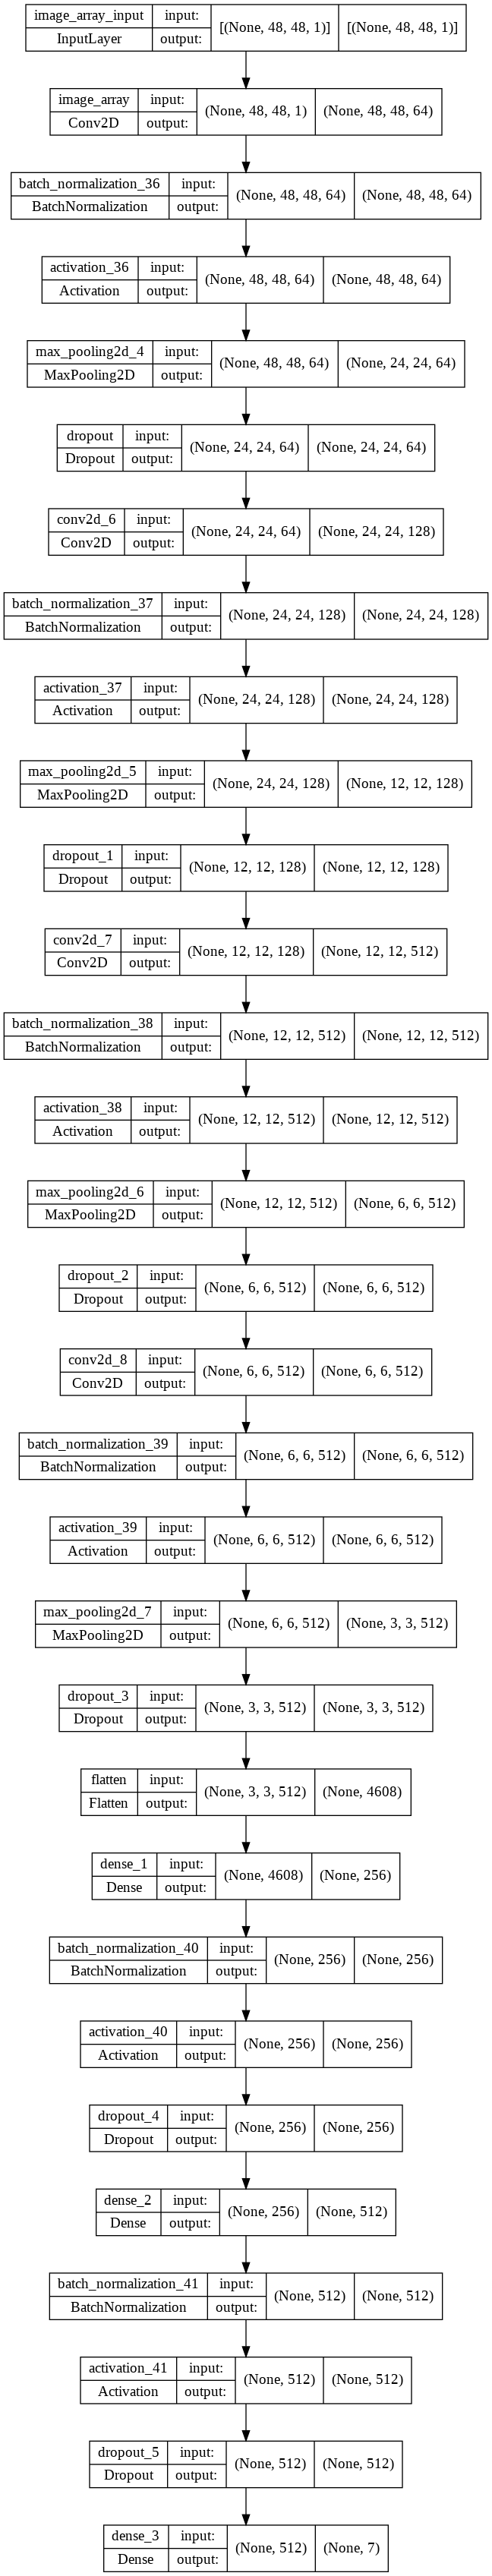

In [30]:
# Plotting architecture of defined model
plot_model(CNN, to_file='CNN.png', show_shapes=True, show_layer_names=True)

In [31]:
# Compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #using Adam Optimizer
CNN.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
CNN.summary() #gives the information about the architecture and configuration of the neural network.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_array (Conv2D)        (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_36 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_36 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)       2

# **Training**

# **Xception**

In [32]:
# Fitting the Model with Training and Validation Data
early_stop = EarlyStopping('val_loss', patience=50, min_delta=0, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(50/4), min_delta=0.0001,model='auto')
trained_models_path = base_path + '_Xception'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [33]:
# Fitting the xception model
xception_history =xception.fit(data_generator.flow(xtrain, ytrain, batch_size),
          steps_per_epoch=len(xtrain) / batch_size, 
          epochs=num_epochs, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(xtest,ytest))

Epoch 1/50
785/785 [==============================] - ETA: 0s - loss: 1.6580 - accuracy: 0.3445
Epoch 1: val_loss improved from inf to 5.77996, saving model to models/_Xception.01-0.13.hdf5
785/785 [==============================] - 68s 66ms/step - loss: 1.6580 - accuracy: 0.3445 - val_loss: 5.7800 - val_accuracy: 0.1318 - lr: 0.0010
Epoch 2/50
785/785 [==============================] - ETA: 0s - loss: 1.4544 - accuracy: 0.4365
Epoch 2: val_loss improved from 5.77996 to 1.95590, saving model to models/_Xception.02-0.36.hdf5
785/785 [==============================] - 52s 66ms/step - loss: 1.4544 - accuracy: 0.4365 - val_loss: 1.9559 - val_accuracy: 0.3562 - lr: 0.0010
Epoch 3/50
785/785 [==============================] - ETA: 0s - loss: 1.3567 - accuracy: 0.4762
Epoch 3: val_loss improved from 1.95590 to 1.32466, saving model to models/_Xception.03-0.50.hdf5
785/785 [==============================] - 50s 64ms/step - loss: 1.3567 - accuracy: 0.4762 - val_loss: 1.3247 - val_accuracy: 0.50

It took around 45 to 50 minutes to run all 70 epochs. The training gave the accuracy of 72% approx and val_accuracy of 64%.

It gives good prediction on train as well as test data.

Let's see the performance of Trained Deep CNN model.

**Trained Deep Convolutional Neural Network(CNN):**

In [34]:
# Fitting the Model with Training and Validation Data
early_stop = EarlyStopping('val_loss', patience=50)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=25, min_lr=0.00001,model='auto')
trained_models_path = base_path + 'CNN'
model_names = trained_models_path + '.{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True, mode='max')
callbacks = [model_checkpoint, early_stop, reduce_lr]

In [35]:
# Fitting the CNN model
CNN_history =CNN.fit(data_generator.flow(xtrain, ytrain, batch_size),
          steps_per_epoch=len(xtrain) / batch_size,
          epochs=num_epochs, 
          verbose=1, 
          callbacks=callbacks,
          validation_data=(xtest,ytest))

Epoch 1/50
785/785 [==============================] - ETA: 0s - loss: 1.8588 - accuracy: 0.2669
Epoch 1: val_loss improved from -inf to 1.75253, saving model to models/CNN.01-0.33.hdf5
785/785 [==============================] - 33s 38ms/step - loss: 1.8588 - accuracy: 0.2669 - val_loss: 1.7525 - val_accuracy: 0.3256 - lr: 0.0010
Epoch 2/50
785/785 [==============================] - ETA: 0s - loss: 1.5518 - accuracy: 0.3984
Epoch 2: val_loss did not improve from 1.75253
785/785 [==============================] - 29s 37ms/step - loss: 1.5518 - accuracy: 0.3984 - val_loss: 1.4653 - val_accuracy: 0.4339 - lr: 0.0010
Epoch 3/50
784/785 [============================>.] - ETA: 0s - loss: 1.4066 - accuracy: 0.4582
Epoch 3: val_loss did not improve from 1.75253
785/785 [==============================] - 29s 37ms/step - loss: 1.4066 - accuracy: 0.4582 - val_loss: 1.3097 - val_accuracy: 0.4859 - lr: 0.0010
Epoch 4/50
785/785 [==============================] - ETA: 0s - loss: 1.3221 - accuracy: 0.

It took around 30-35 minutes to run all epochs. The training gave the accuracy of 72% and va_accuracy of 69%. It seems quite good.

# **Plotting Accuracy & Loss**

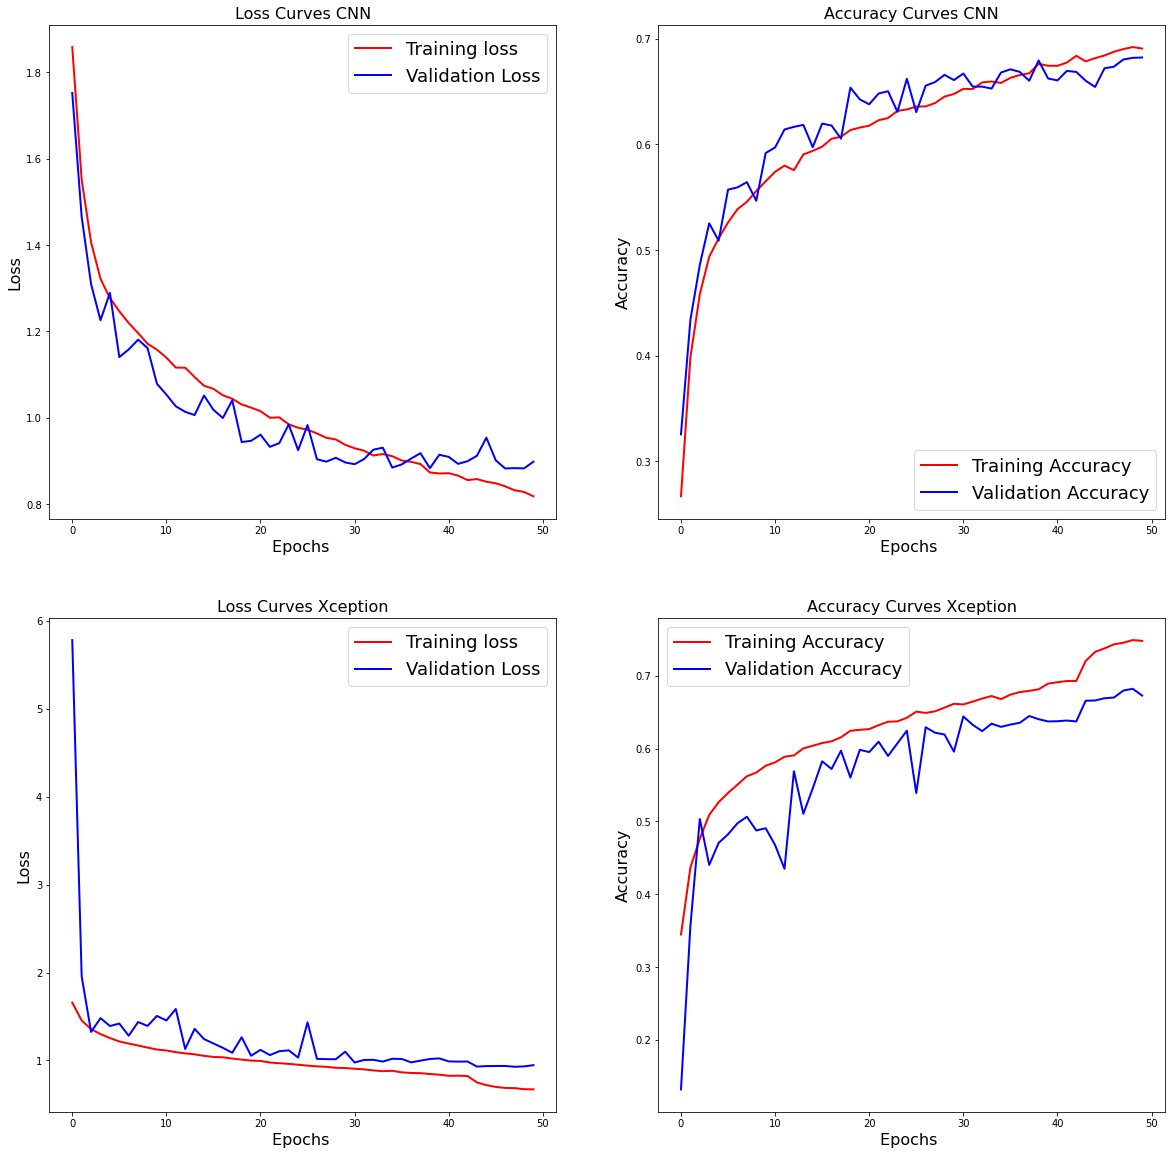

In [36]:
# Plotting accuracy and loss curve for each model
fig,axes=plt.subplots(2,2,figsize=(20, 20))
for (m,history), ax in zip({'CNN':CNN_history,'Xception':xception_history}.items(),axes):
    # Loss Curves    
    ax[0].plot(history.history['loss'],'r',linewidth=2.0)
    ax[0].plot(history.history['val_loss'],'b',linewidth=2.0)
    ax[0].legend(['Training loss', 'Validation Loss'],fontsize=18)
    ax[0].set_xlabel('Epochs ',fontsize=16)
    ax[0].set_ylabel('Loss',fontsize=16)
    ax[0].set_title('Loss Curves '+m,fontsize=16)
 
    # Accuracy Curves
    ax[1].plot(history.history['accuracy'],'r',linewidth=2.0)
    ax[1].plot(history.history['val_accuracy'],'b',linewidth=2.0)
    ax[1].legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    ax[1].set_xlabel('Epochs ',fontsize=16)
    ax[1].set_ylabel('Accuracy',fontsize=16)
    ax[1].set_title('Accuracy Curves '+m,fontsize=16)

In [37]:
# saving the plot
plt.savefig('plots.png')

<Figure size 432x288 with 0 Axes>

From above loss and accuracy plot it is seen that the accuracy & loss curve of Trained Deep CNN model is gradually increasing also the validation loss curve is below the training loss curve on the other hand the Xception shows the slightly lower accuracy compare to the trained CNN model.

# **Classificastion Reports**

In [38]:
# Printing the classification report of all models
for model in [CNN,xception]:
    ypred=model.predict(xtest)
    ypred_=np.argmax(ypred, axis=1)
    ytest_=np.argmax(ytest, axis=1)
    print(classification_report(ytest_, ypred_,digits=3))

              precision    recall  f1-score   support

           0      0.605     0.615     0.610       421
           1      0.794     0.600     0.684        45
           2      0.661     0.355     0.462       468
           3      0.885     0.871     0.878       832
           4      0.596     0.547     0.570       552
           5      0.721     0.828     0.770       377
           6      0.544     0.771     0.638       536

    accuracy                          0.682      3231
   macro avg      0.687     0.655     0.659      3231
weighted avg      0.690     0.682     0.675      3231

              precision    recall  f1-score   support

           0      0.587     0.577     0.582       421
           1      0.775     0.689     0.729        45
           2      0.539     0.470     0.502       468
           3      0.891     0.870     0.880       832
           4      0.560     0.569     0.564       552
           5      0.764     0.745     0.754       377
           6      0.576 

From above classification report it is seen that the Recall, Precision and f1 score of Custom trained Deep CNN modedl is high compare to Xception model.

**Confusion Matrix**

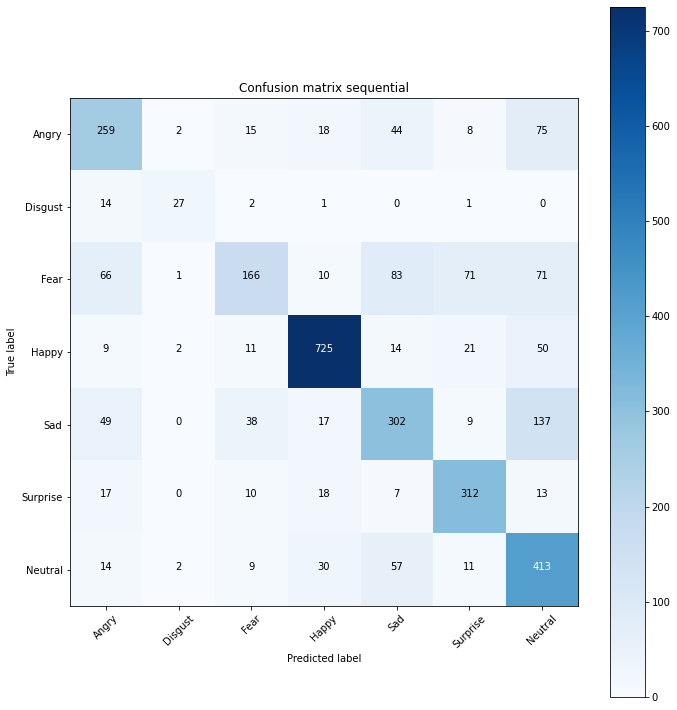

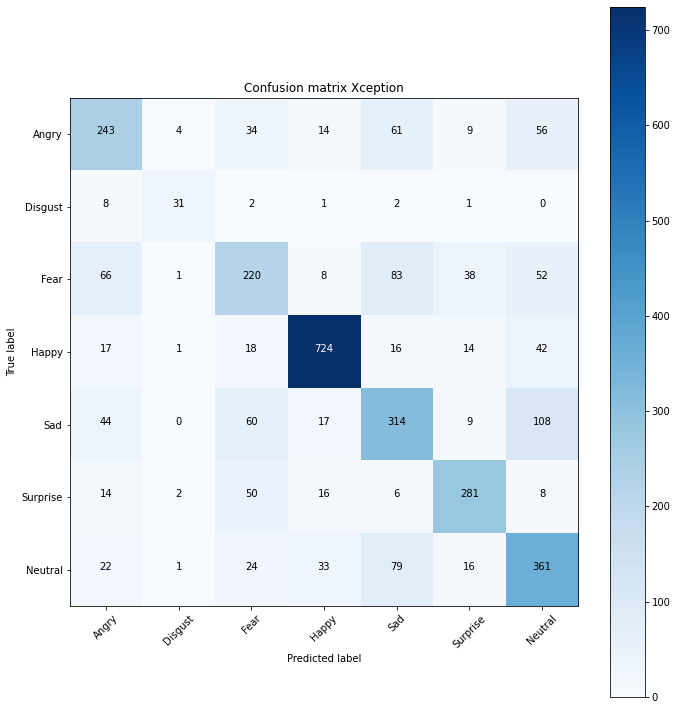

In [39]:
import itertools
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

# Printing the confusion matrix for each model
for model,i in zip([CNN,xception],[1,2,3]):
    fig = figure(figsize=(10, 10))
    
    ypred=model.predict(xtest)
    rounded_predections=np.argmax(ypred, axis=1)
    rounded_labels=np.argmax(ytest, axis=1)
    cm = confusion_matrix(rounded_labels, rounded_predections)
    labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    title='Confusion matrix '+model.name
    

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig('confusion_matrix_'+model.name+'.png')
    plt.show()

From the confusion metrix above we observe the emotions that are correctly predicted w.r.t actual emotions.

In above confusion metrices the Deep CNN model has predicted most of the emotions correctly comapare to Xception model.

**Now we are going to use the Trained CNN Model for live video face emotion recognition.**

In [40]:
# Save best Model
CNN.save('Final_model.h5')

In [41]:
# Saving model in json format along with weights
fer_json = xception.to_json()  
with open("fer.json", "w") as json_file:  
    json_file.write(fer_json)  
xception.save_weights("fer.h5")

In [42]:
# import dependencies
from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [43]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [44]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [45]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [48]:
# Defining function to detect face
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image
# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  bbox = ''
  count = 0
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/face emotion recognition/files/my_env/haarcascade_frontalface_default.xml') # Face Detection
  classifier =load_model('/content/drive/MyDrive/face emotion recognition/files/my_env/Final_model.h5')  #Load model
  emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise'] 

  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction
      if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction
        prediction = classifier.predict(roi)[0]   #Prediction
        label=emotion_labels[prediction.argmax()]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)



    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

In [50]:
# Finally detecting the face with live webcam
face_detect()

<IPython.core.display.Javascript object>

# **Conclusion:**

The data preprocessing takes time for processing each image.

The Custom trained CNN model gives training accuracy of 77% and test accuracy of 69% which is pretty good compare to the Xception model.

Since, the emotion counts of disgust and fear images are less therefore on local webcam it hardly detect those emotions.

